In [ ]:
# !pip install keras_cv_attention_models

In [5]:

from tensorflow import keras
import evals
import tensorflow as tf
import IJB_evals
import matplotlib.pyplot as plt
import keras_cv_attention_models
import GhostFaceNets, GhostFaceNets_with_Bias

In [6]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2 ways to load the model

Stride 2

In [16]:
#Either
basic_model = keras.models.load_model('checkpoints/GN_W0.5_S2_ArcFace_epoch16.h5', compile=False)

In [ ]:
#If the above did not work, then you need to build the model then load the weights. e.g.,
basic_model = GhostFaceNets_with_Bias.buildin_models("ghostnetv1", dropout=0, emb_shape=512, output_layer='GDC', bn_momentum=0.9, bn_epsilon=1e-5)
basic_model = GhostFaceNets_with_Bias.add_l2_regularizer_2_model(basic_model, weight_decay=5e-4, apply_to_batch_normal=False)
basic_model = GhostFaceNets_with_Bias.replace_ReLU_with_PReLU(basic_model, target_activation='PReLU')

basic_model.load_weights('checkpoints/ghostnetv1_w1.3_s2.h5')

Stride 1

In [7]:
#Either
basic_model = keras.models.load_model('checkpoints/GhostFaceNet_W1.3_S1_ArcFace.h5', compile=False)

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1650, compute capability 7.5


In [ ]:
#If the above did not work, then you need to build the model then load the weights. e.g.,
basic_model = GhostFaceNets_with_Bias.buildin_models("ghostnetv1", dropout=0, emb_shape=512, output_layer='GDC', bn_momentum=0.9, bn_epsilon=1e-5, scale=True, use_bias=True, strides=1)
basic_model = GhostFaceNets_with_Bias.add_l2_regularizer_2_model(basic_model, weight_decay=5e-4, apply_to_batch_normal=False)
basic_model = GhostFaceNets_with_Bias.replace_ReLU_with_PReLU(basic_model, target_activation='PReLU')

basic_model.load_weights('checkpoints/ghostnetv1_w1.3_s1.h5')

In [8]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/lfw.bin', batch_size=256, flip=True, PCA_acc=True)
ee.on_epoch_end(0)

Evaluating lfw: 100%|██████████| 47/47 [01:57<00:00,  2.49s/it]


ValueError: Expect x to not have duplicates

In [17]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/lfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating lfw: 100%|██████████| 47/47 [00:19<00:00,  2.37it/s]


>>>> lfw evaluation max accuracy: 0.987500, thresh: 0.226920, previous max accuracy: 0.000000
>>>> Improved = 0.987500


In [ ]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/vgg2_fp.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

In [11]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/cfp_fp.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating cfp_fp: 100%|██████████| 55/55 [01:41<00:00,  1.85s/it]


>>>> cfp_fp evaluation max accuracy: 0.978286, thresh: 0.188336, previous max accuracy: 0.000000
>>>> Improved = 0.978286


In [ ]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/cfp_fp.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

In [ ]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/calfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

In [ ]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/cplfw.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

In [12]:
ee = evals.eval_callback(basic_model, 'datasets/faces_emore/agedb_30.bin', batch_size=256, flip=True, PCA_acc=False)
ee.on_epoch_end(0)

Evaluating agedb_30: 100%|██████████| 47/47 [01:26<00:00,  1.84s/it]


>>>> agedb_30 evaluation max accuracy: 0.980000, thresh: 0.208199, previous max accuracy: 0.000000
>>>> Improved = 0.980000


In [ ]:
tt = IJB_evals.IJB_test(lambda imgs: basic_model((tf.cast(imgs, "float32") - 127.5) * 0.0078125).numpy(), data_path='path_to_IJB_Dataset/ijb-testsuite/ijb', subset='IJBB', batch_size=16)

In [ ]:
score = tt.run_model_test_single()

In [ ]:
IJB_evals.plot_roc_and_calculate_tpr([score], names=[basic_model.name + "_IJBB"], label=tt.label)

In [ ]:
tt = IJB_evals.IJB_test(lambda imgs: basic_model((tf.cast(imgs, "float32") - 127.5) * 0.0078125).numpy(), data_path='C:/Users/mohda/Downloads/ijb-testsuite/ijb', subset='IJBC', batch_size=16)

In [ ]:
score = tt.run_model_test_single()

In [ ]:
IJB_evals.plot_roc_and_calculate_tpr([score], names=[basic_model.name + "_IJBC"], label=tt.label)

Plot face quality distribution using norm value of feature

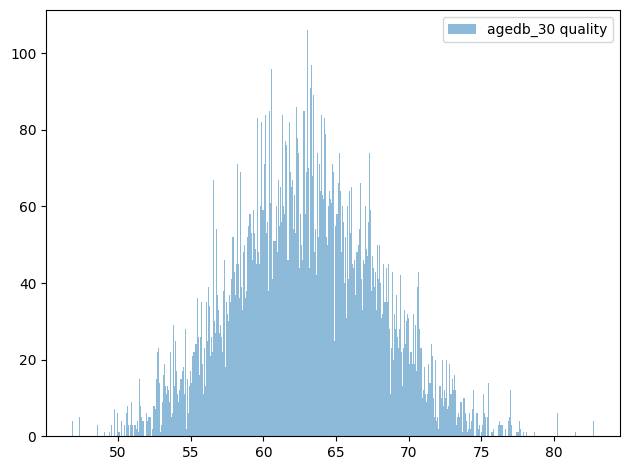

In [13]:
cc = tf.norm(ee.embs, axis=1).numpy()
_ = plt.hist(cc, bins=512, alpha=0.5, label='agedb_30 quality')
# cc = tf.norm(tt.embs, axis=1).numpy()
# _ = plt.hist(cc, bins=512, alpha=0.5, label='IJBC quality')
plt.legend()
plt.tight_layout()